# Cleaning of the geographical enrichment variables

This notebook aims to bring the geographical enrichment variables (https://www.ers.usda.gov/data-products/county-level-data-sets/) into a format that is useful to work with for the purpose of this thesis.

## Set-Up

The goal is to work with pandas dataframes, so numpy and pandas are required.

In [1]:
import pandas as pd 
import numpy as np

## Raw Files

All data (separate datasets on education, population, poverty, and unemployment per state) is available in CSV format, the inbuilt pandas function `read_csv` is utilized to store the data in a pandas dataframe.

In [2]:
educ_raw = pd.read_csv("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/raw/California_Geographic/Education.csv", encoding = "latin1")
pop_raw = pd.read_csv("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/raw/California_Geographic/PopulationEstimates.csv", encoding = "latin1")
pov_raw = pd.read_csv("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/raw/California_Geographic/PovertyEstimates.csv", encoding = "latin1")
unemp_raw = pd.read_csv("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/raw/California_Geographic/Unemployment.csv", encoding = "latin1")

In [3]:
educ_raw.head()

,Federal Information Processing Standard (FIPS) Code,State,Area name,Attribute,Value
0,0,US,United States,"Less than a high school diploma, 1970",52373312.0
1,0,US,United States,"High school diploma only, 1970",34158051.0
2,0,US,United States,"Some college (1-3 years), 1970",11650730.0
3,0,US,United States,"Four years of college or higher, 1970",11717266.0
4,0,US,United States,Percent of adults with less than a high school...,47.7


In [4]:
educ_raw["State"].unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

In [5]:
states = ["SD", "LA", "UT", "TX", "MT"]

## Reshaping

The downloadable CSVs are in a different format than displayed on the USDA homepage. As the aim of these dataframes is to enrich the main dataset, which does contain FIPS codes, the data is reshaped in a way that this FIPS code (together with the corresponding area name) are used to index the dataframe in order to facilitate merging and/or county-level analysis.

### Education

The raw dataframe imported above is filtered to include only the relevant values (i.e. counties, but not the summary of the state itself). Only the percentage values relevant for the thesis are kept, the rest is dropped. Also, only the newest datapoints (years 2017-2021) are kept, the rest is dropped. As the data is structured in a way that information on years and KPIs are stored in the "Attribute" column, the dataframe is pivoted to have the KPIs as column for easier comparability.

In [6]:
educ_low5 = educ_raw[(educ_raw["State"].isin(states)) & 
                     (educ_raw["Attribute"].str.contains("Percent")) & 
                     (educ_raw["Attribute"].str.contains("2017-21"))]

# drop all rows that have the State Name as Area Name
educ_low5 = educ_low5[educ_low5["Area name"] != "South Dakota"]
educ_low5 = educ_low5[educ_low5["Area name"] != "Louisiana"]
educ_low5 = educ_low5[educ_low5["Area name"] != "Lousiana"]
educ_low5 = educ_low5[educ_low5["Area name"] != "Utah"]
educ_low5 = educ_low5[educ_low5["Area name"] != "Texas"]
educ_low5 = educ_low5[educ_low5["Area name"] != "Montana"]
 
educ_low5_t = educ_low5.pivot(index = ["Federal Information Processing Standard (FIPS) Code", "Area name"],columns="Attribute", values="Value")

In [7]:
educ_low5_t.shape

(469, 4)

In [8]:
educ_low5_t.head()

,Attribute,"Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults with less than a high school diploma, 2017-21"
Federal Information Processing Standard (FIPS) Code,Area name,,,,
22001,Acadia Parish,23.745889,13.613823,42.945138,19.695151
22003,Allen Parish,24.321330,12.132964,43.324100,20.221607
22005,Ascension Parish,30.852523,28.719990,29.115630,11.311857
22007,Assumption Parish,22.666399,10.800857,43.290478,23.242266
22009,Avoyelles Parish,28.542185,12.308086,35.717941,23.431788


### Population

The only relevant KPI from this dataframe is the most recent (2022) population figure ("POP_ESTIMATE_2022"). Besides that (and a different variable naming), the procedure is the same as for the education dataframe.

In [9]:
pop_low5 = pop_raw[(pop_raw["State"].isin(states)) &
                   (pop_raw["Attribute"].str.contains("POP_ESTIMATE_2022"))]

pop_low5 = pop_low5[pop_low5["Area_Name"] != "South Dakota"]
pop_low5 = pop_low5[pop_low5["Area_Name"] != "Louisiana"]
pop_low5 = pop_low5[pop_low5["Area_Name"] != "Lousiana"]
pop_low5 = pop_low5[pop_low5["Area_Name"] != "Utah"]
pop_low5 = pop_low5[pop_low5["Area_Name"] != "Texas"]
pop_low5 = pop_low5[pop_low5["Area_Name"] != "Montana"]

pop_low5_t = pop_low5.pivot(index = ["FIPStxt", "Area_Name"],columns="Attribute", values="Value")

In [10]:
pop_low5_t.shape

(469, 1)

In [11]:
pop_low5_t.head()

,Attribute,POP_ESTIMATE_2022
FIPStxt,Area_Name,
22001,Acadia Parish,56744.0
22003,Allen Parish,22320.0
22005,Ascension Parish,130458.0
22007,Assumption Parish,20604.0
22009,Avoyelles Parish,38751.0


### Poverty

The variable of interest in this dataframe is "PCTPOVALL_2021", which is the estimation of people living in poverty among all people in the county. The procedure is the same as for the education dataframe.

In [12]:
pov_low5 = pov_raw[(pov_raw["Stabr"].isin(states)) &
                   (pov_raw["Attribute"].str.contains("PCTPOVALL_2021"))]

pov_low5 = pov_low5[pov_low5["Area_name"] != "South Dakota"]
pov_low5 = pov_low5[pov_low5["Area_name"] != "Louisiana"]
pov_low5 = pov_low5[pov_low5["Area_name"] != "Lousiana"]
pov_low5 = pov_low5[pov_low5["Area_name"] != "Utah"]
pov_low5 = pov_low5[pov_low5["Area_name"] != "Texas"]
pov_low5 = pov_low5[pov_low5["Area_name"] != "Montana"]

pov_low5_t = pov_low5.pivot(index = ["FIPS_Code", "Area_name"],columns="Attribute", values="Value")

In [13]:
pop_low5_t.shape

(469, 1)

In [14]:
pov_low5_t.head()

,Attribute,PCTPOVALL_2021
FIPS_Code,Area_name,
22001,Acadia Parish,20.6
22003,Allen Parish,20.5
22005,Ascension Parish,11.4
22007,Assumption Parish,19.0
22009,Avoyelles Parish,30.5


### Unemployment

The unemployment dataframe contains two values of interest per county: The unemployment rate (for the sake of this analysis, the most recent figures from 2022 - "Unemployment_rate_2022" is used) and the median household income ("Median_Household_Income_2022"). The procedure is the same as for the previous dataframes. 

In [15]:
unemp_low5 = unemp_raw[(unemp_raw["State"].isin(states)) &
                       (unemp_raw["Attribute"].isin(["Unemployment_rate_2022", "Median_Household_Income_2021"]))]

unemp_low5 = unemp_low5[unemp_low5["Area_Name"] != "South Dakota"]
unemp_low5 = unemp_low5[unemp_low5["Area_Name"] != "Louisiana"]
unemp_low5 = unemp_low5[unemp_low5["Area_Name"] != "Lousiana"]
unemp_low5 = unemp_low5[unemp_low5["Area_Name"] != "Utah"]
unemp_low5 = unemp_low5[unemp_low5["Area_Name"] != "Texas"]
unemp_low5 = unemp_low5[unemp_low5["Area_Name"] != "Montana"]

unemp_low5_t = unemp_low5.pivot(index = ["FIPS_Code", "Area_Name"],columns="Attribute", values="Value")

In [16]:
unemp_low5_t.shape

(469, 2)

In [17]:
unemp_low5_t.head()

,Attribute,Median_Household_Income_2021,Unemployment_rate_2022
FIPS_Code,Area_Name,,
22001,"Acadia Parish, LA",44648.0,3.7
22003,"Allen Parish, LA",43192.0,4.2
22005,"Ascension Parish, LA",75498.0,3.0
22007,"Assumption Parish, LA",42404.0,4.6
22009,"Avoyelles Parish, LA",38567.0,4.2


## Check completeness

Checking if there are data available for all counties

In [18]:
print(educ_low5_t.shape, pop_low5_t.shape, pov_low5_t.shape, unemp_low5_t.shape)

(469, 4) (469, 1) (469, 1) (469, 2)


In [19]:
print(educ_low5_t.isna().sum(), "\n", pop_low5_t.isna().sum(), "\n", pov_low5_t.isna().sum(), "\n", unemp_low5_t.isna().sum())

Attribute
Percent of adults completing some college or associate's degree, 2017-21    0
Percent of adults with a bachelor's degree or higher, 2017-21               0
Percent of adults with a high school diploma only, 2017-21                  0
Percent of adults with less than a high school diploma, 2017-21             0
dtype: int64 
 Attribute
POP_ESTIMATE_2022    0
dtype: int64 
 Attribute
PCTPOVALL_2021    0
dtype: int64 
 Attribute
Median_Household_Income_2021    0
Unemployment_rate_2022          0
dtype: int64


## Merging

In order to create one dataframe containing all information, the dataframes are merged based on their indices. As the indices are named differently and multiindexing is used, the indices are renamed to match the FIPS code and county name of the main dataframe by overwriting the indices of all dataframes with the indices of the education dataframes. This is only possible as we have already checked for completeness of the data and have ensured that all index values and their order are identical (albeit named differently). The resulting dataframe holds all information in a unified format, structured by FIPS code and county name.

In [20]:
pop_low5_t.index = educ_low5_t.index
pov_low5_t.index = educ_low5_t.index
unemp_low5_t.index = educ_low5_t.index

In [21]:
# Merge the dataframes based on the first item of the index
low5_geo = educ_low5_t.merge(pop_low5_t, left_index = True, right_index = True, how = "inner")
low5_geo = low5_geo.merge(pov_low5_t, left_index = True, right_index = True, how = "inner")
low5_geo = low5_geo.merge(unemp_low5_t, left_index = True, right_index = True, how = "inner")

In [22]:
low5_geo.head()

,Attribute,"Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults with less than a high school diploma, 2017-21",POP_ESTIMATE_2022,PCTPOVALL_2021,Median_Household_Income_2021,Unemployment_rate_2022
Federal Information Processing Standard (FIPS) Code,Area name,,,,,,,,
22001,Acadia Parish,23.745889,13.613823,42.945138,19.695151,56744.0,20.6,44648.0,3.7
22003,Allen Parish,24.321330,12.132964,43.324100,20.221607,22320.0,20.5,43192.0,4.2
22005,Ascension Parish,30.852523,28.719990,29.115630,11.311857,130458.0,11.4,75498.0,3.0
22007,Assumption Parish,22.666399,10.800857,43.290478,23.242266,20604.0,19.0,42404.0,4.6
22009,Avoyelles Parish,28.542185,12.308086,35.717941,23.431788,38751.0,30.5,38567.0,4.2


## Renaming

The columns are renamed to reflect the KPIs they contain.

In [23]:
low5_geo.index.names = ["FIPS", "County"]
low5_geo.columns = ["percentage_college_degree", "percentage_bachelor_or_higher", "percentage_high_school", "percentage_less_than_high_school", "population", "poverty_rate", "median_household_income", "unemployment_rate"]

In [24]:
low5_geo.head()

,,percentage_college_degree,percentage_bachelor_or_higher,percentage_high_school,percentage_less_than_high_school,population,poverty_rate,median_household_income,unemployment_rate
FIPS,County,,,,,,,,
22001,Acadia Parish,23.745889,13.613823,42.945138,19.695151,56744.0,20.6,44648.0,3.7
22003,Allen Parish,24.321330,12.132964,43.324100,20.221607,22320.0,20.5,43192.0,4.2
22005,Ascension Parish,30.852523,28.719990,29.115630,11.311857,130458.0,11.4,75498.0,3.0
22007,Assumption Parish,22.666399,10.800857,43.290478,23.242266,20604.0,19.0,42404.0,4.6
22009,Avoyelles Parish,28.542185,12.308086,35.717941,23.431788,38751.0,30.5,38567.0,4.2


In [25]:
low5_geo.describe()

,percentage_college_degree,percentage_bachelor_or_higher,percentage_high_school,percentage_less_than_high_school,population,poverty_rate,median_household_income,unemployment_rate
count,469.000000,469.000000,469.000000,469.000000,4.690000e+02,469.000000,469.000000,469.000000
mean,30.888248,21.659404,32.927245,14.525102,8.535886e+04,15.873774,56632.249467,3.552239
std,6.026791,8.418076,6.602939,8.184568,3.187045e+05,6.234949,13935.820458,1.205055
min,0.000000,0.000000,12.929543,0.602410,5.100000e+01,3.900000,25653.000000,0.600000
25%,27.628032,15.912840,29.175879,8.701854,5.281000e+03,11.500000,47373.000000,2.700000
50%,31.033956,19.786680,33.135356,13.208463,1.447300e+04,14.800000,53891.000000,3.500000
75%,33.950082,25.742040,37.415919,18.837264,4.724700e+04,18.900000,63014.000000,4.200000
max,76.923077,55.169506,51.170314,81.553398,4.780913e+06,43.500000,124354.000000,11.000000


In [26]:
low5_geo_k = low5_geo.copy()
low5_geo_k["population"] = low5_geo_k["population"]/1000
low5_geo_k["median_household_income"] = low5_geo_k["median_household_income"]/1000
#print(np.round(low5_geo_k.describe(), 2).T[['count','mean', 'std', 'min', 'max']].applymap('{:,.2f}'.format).to_latex())
np.round(low5_geo_k.describe(), 2).T[['count','mean', 'std', 'min', 'max']].applymap('{:,.2f}'.format)

,count,mean,std,min,max
percentage_college_degree,469.00,30.89,6.03,0.00,76.92
percentage_bachelor_or_higher,469.00,21.66,8.42,0.00,55.17
percentage_high_school,469.00,32.93,6.60,12.93,51.17
percentage_less_than_high_school,469.00,14.53,8.18,0.60,81.55
population,469.00,85.36,318.70,0.05,"4,780.91"
poverty_rate,469.00,15.87,6.23,3.90,43.50
median_household_income,469.00,56.63,13.94,25.65,124.35
unemployment_rate,469.00,3.55,1.21,0.60,11.00


### EDA

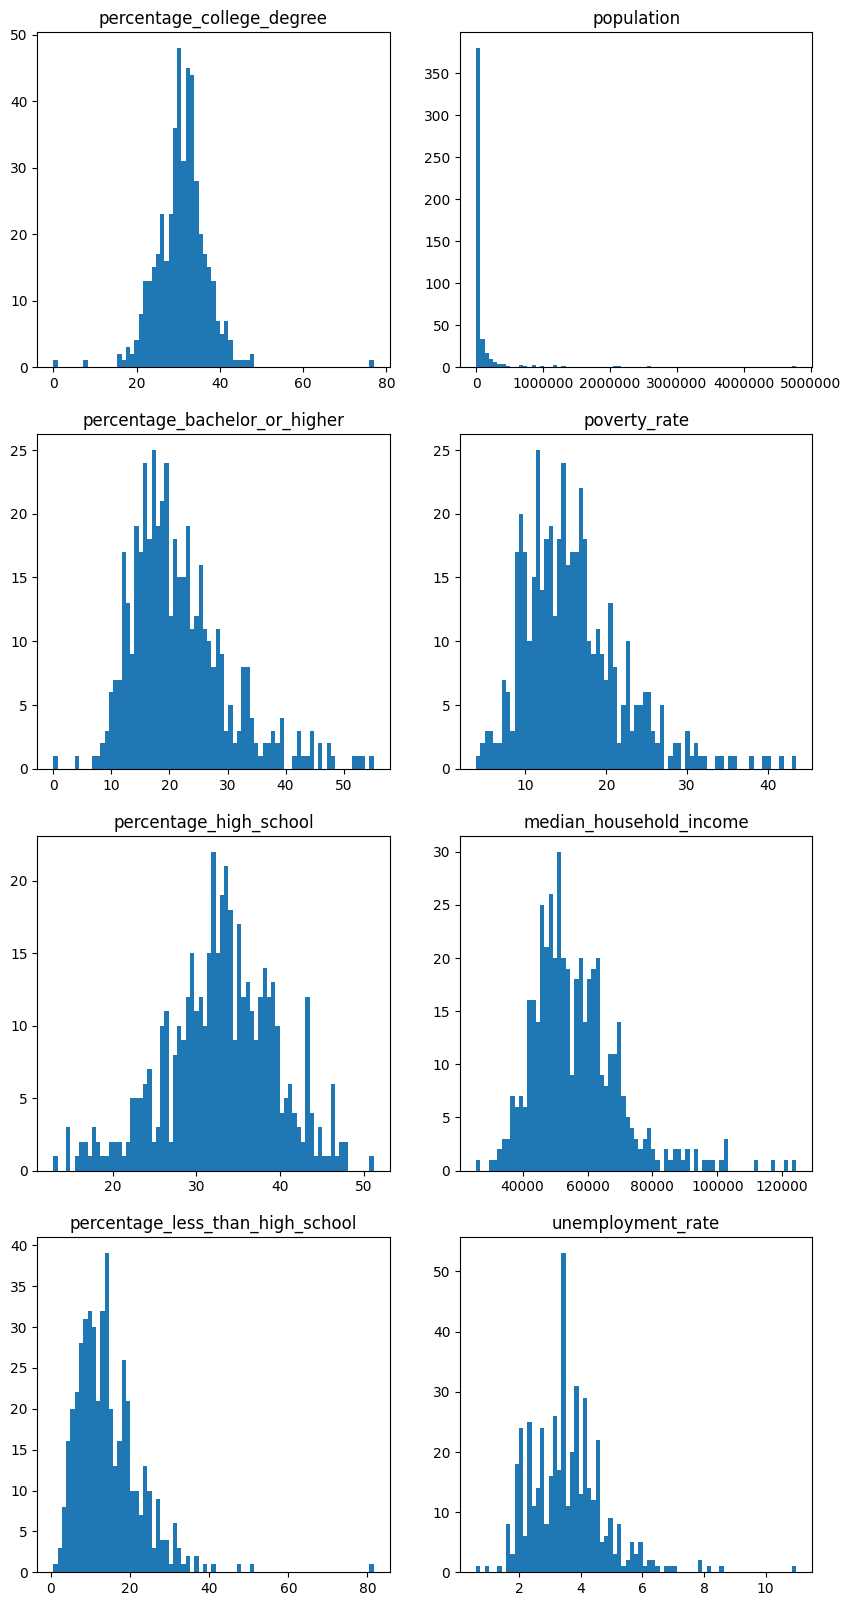

In [46]:
fig, axs = plt.subplots(4, 2, figsize = (10, 20))
for i, col in enumerate(low5_geo.columns):
    axs[i%4, i//4].hist(low5_geo[col], bins = 75)
    axs[i%4, i//4].ticklabel_format(style='plain', axis='x')
    axs[i%4, i//4].set_title(col)

plt.show()

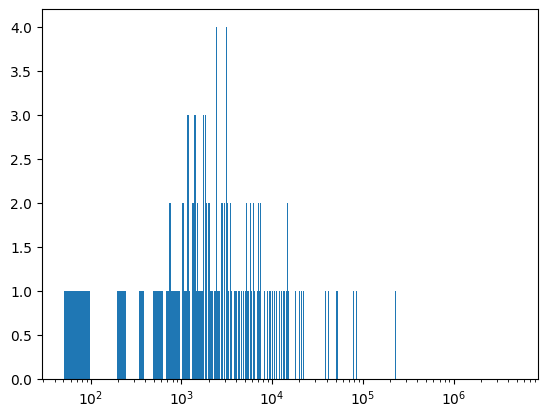

In [39]:
plt.hist(low5_geo["population"], bins = 100000)
plt.xscale("log")
plt.show()

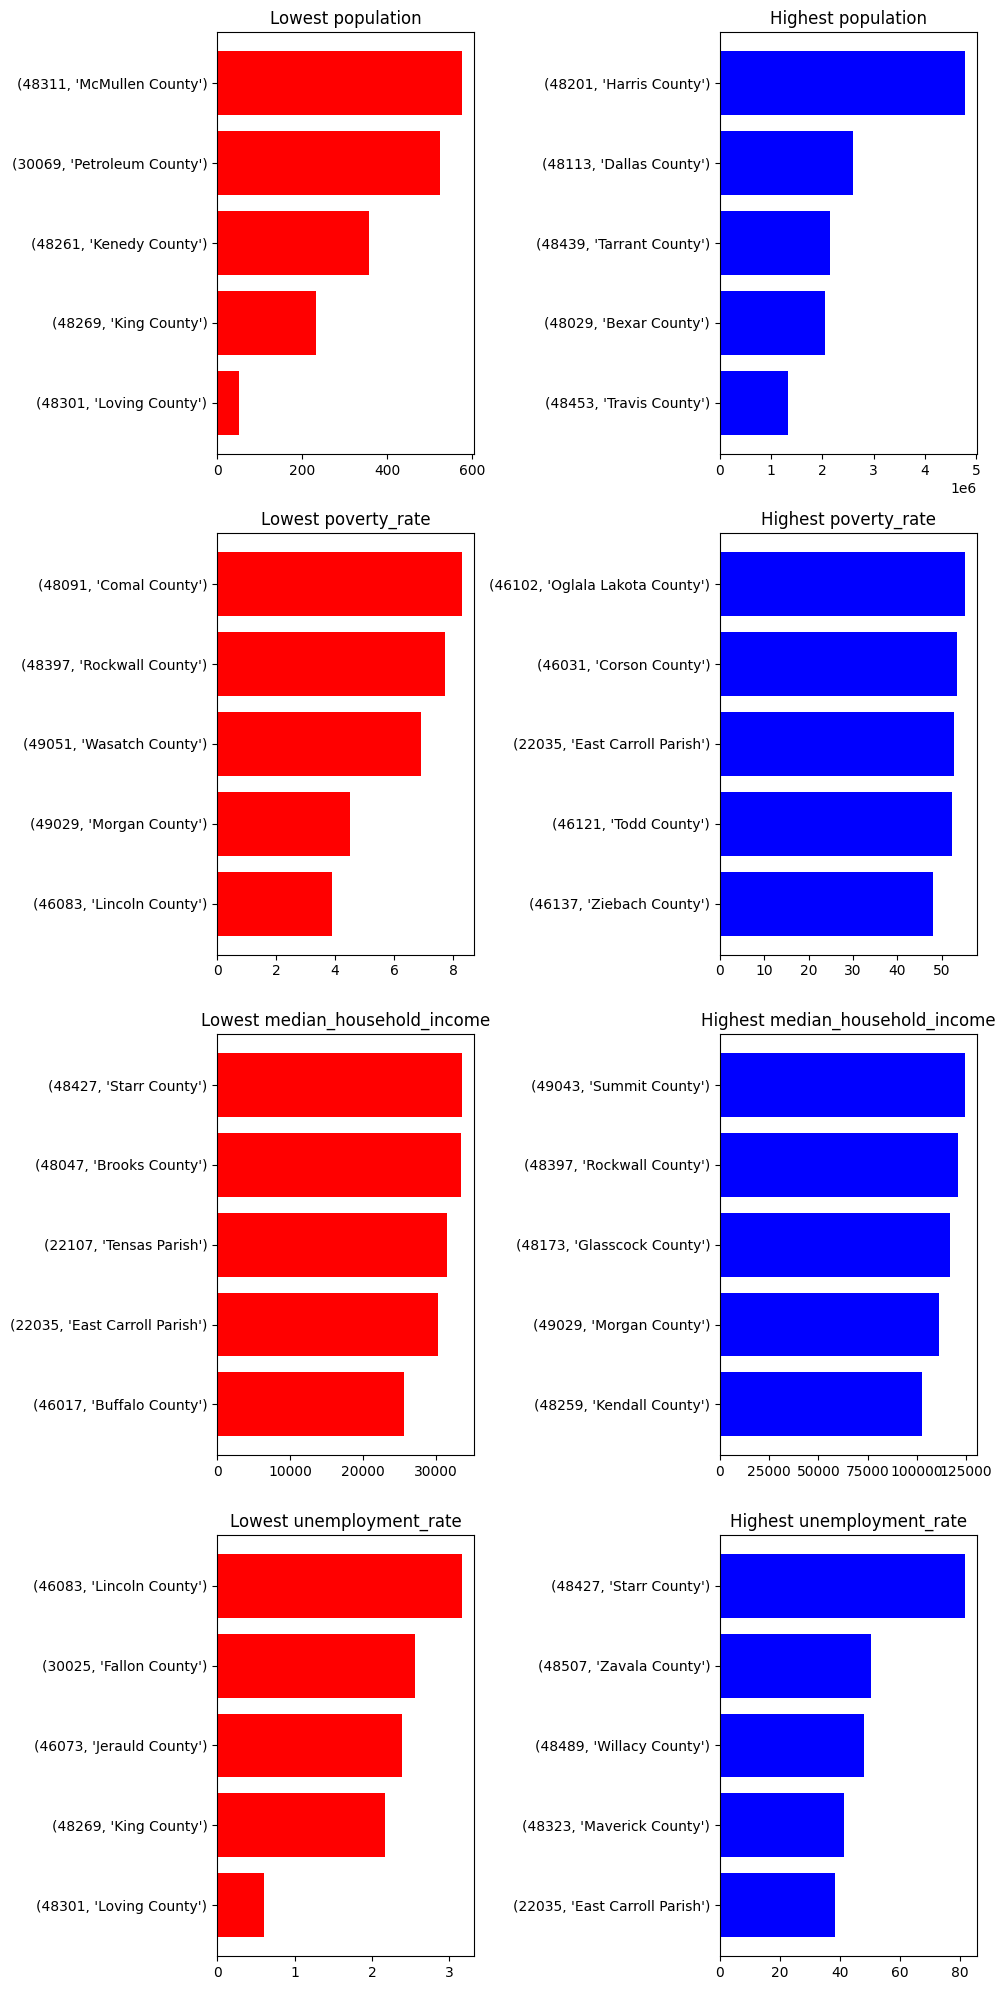

In [54]:
# Create a figure and subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Iterate over each column
for i, col in enumerate(low5_geo.columns):
    # Sort the column values
    sorted_values = low5_geo[col].sort_values()
    
    # Select the 5 lowest and 5 highest values
    lowest_values = sorted_values.head(5)
    highest_values = sorted_values.tail(5)
    
    # Plot the lowest values in a column chart
    axs[i % 4, 0].barh(range(len(lowest_values)), lowest_values.values, color='red')
    axs[i % 4, 0].set_yticks(range(len(lowest_values)))
    axs[i % 4, 0].set_yticklabels(lowest_values.index)
    axs[i % 4, 0].set_title(f'Lowest {col}')
    
    # Plot the highest values in a column chart
    axs[i % 4, 1].barh(range(len(highest_values)), highest_values.values, color='blue')
    axs[i % 4, 1].set_yticks(range(len(highest_values)))
    axs[i % 4, 1].set_yticklabels(highest_values.index)
    axs[i % 4, 1].set_title(f'Highest {col}')

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
low5_geo.sort_values("population", ascending = True).head()

,,percentage_college_degree,percentage_bachelor_or_higher,percentage_high_school,percentage_less_than_high_school,population,poverty_rate,median_household_income,unemployment_rate
FIPS,County,,,,,,,,
48301,Loving County,76.923077,0.000000,17.307692,5.769231,51.0,5.3,100917.0,0.6
48269,King County,15.662651,25.301205,35.542169,23.493976,233.0,11.6,74890.0,0.9
48261,Kenedy County,0.000000,3.883495,14.563107,81.553398,358.0,14.2,42379.0,6.1
30069,Petroleum County,29.819277,28.313253,41.265060,0.602410,524.0,12.9,48141.0,3.0
48311,McMullen County,27.858628,15.384615,46.569647,10.187110,576.0,12.1,63120.0,1.8


In [28]:
low5_geo.to_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/processed/enrichment/low5_geo.pkl")

In [45]:
# create a dataframe containing the summary values as well as the top 5 and bottom 5 counties for median_household income
low5_geo_summary_mhi = low5_geo["median_household_income"].describe().T
'''
low5_geo_summary_mhi = low5_geo_summary_mhi.append(low5_geo.loc[low5_geo["median_household_income"].idxmax()])
low5_geo_summary_mhi = low5_geo_summary_mhi.append(low5_geo.loc[low5_geo["median_household_income"].idxmin()])
low5_geo_summary_mhi = low5_geo_summary_mhi.drop("count", axis = 1)'''

low5_geo_summary_mhi

count       469.000000
mean      56632.249467
std       13935.820458
min       25653.000000
25%       47373.000000
50%       53891.000000
75%       63014.000000
max      124354.000000
Name: median_household_income, dtype: float64

### Correlation Analysis

As a high correlation between the KPIs is expected, a correlation matrix is created.

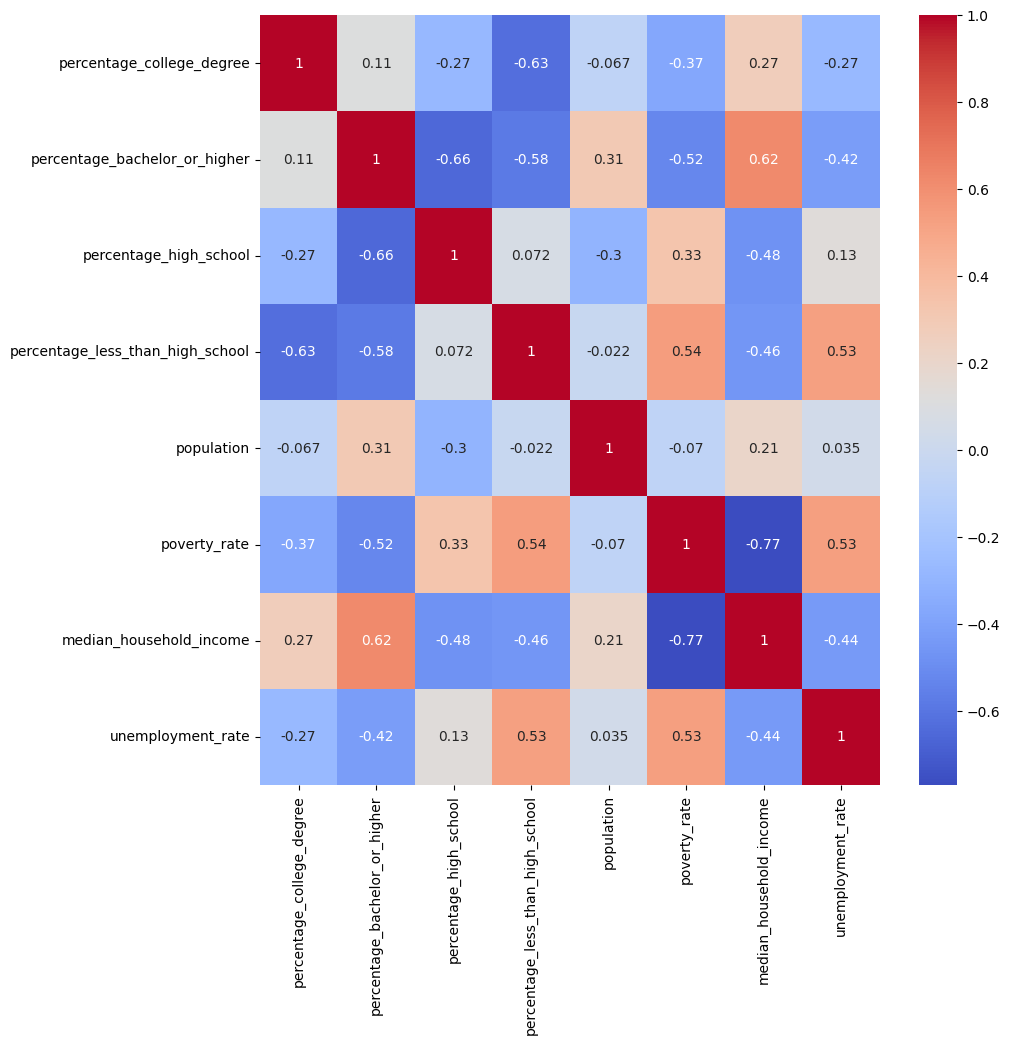

In [29]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(low5_geo.corr(), annot=True, cmap="coolwarm")
plt.show()